In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [58]:
pd.set_option('display.max_column', None)
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_row', None)

### Data Overveiw

In [59]:
df = pd.read_csv('/content/car_data.csv')
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007.0,NaN,70000.0,Petrrol,NaN,Manual,First Owner
1,Maruti Wagon R LXI Minor,NaN,135000.0,50000.0,Petorl,Indvidual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012.0,600000.0,100000.0,Deisel,Indvidual,Manual,First Owner
3,Datsun RediGO T Option,2017.0,250000.0,46000.0,Petorl,Indivudal,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014.0,450000.0,141000.0,Diesl,Indivudal,Manual,Second Owner


#### **We used Cars dataset with features includingt name, year, selling_price, and another properties of the car**

##### *Now we observe the each features present in the dataset*

- name: The name feature is the name of the car (The company, the series).
- year: The year feature describers the model or different version of Car models.
- selling_price: The selling_price feature represents the price that the Car has been sold with
- km_driven: The km_driven feature represents  the number of Kilo_Metres the car had been drived
- fuel: The fuel feature determine the type of the energy that the car uses to move (diesel, Petrol, CNG, etc....)
- seller_type: The seller_type feature determine from whom seller the costumer buys this car
- transmission:  It is the type of feature that describe about the car transmission type i.e Mannual or automatic.
- owner: It is the number or type of the user for this Car.

In [60]:
df.columns

Index(['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner'],
      dtype='object')

In [61]:
df.shape

(4345, 8)

In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4345 entries, 0 to 4344
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           4017 non-null   object 
 1   year           4041 non-null   float64
 2   selling_price  4054 non-null   float64
 3   km_driven      4026 non-null   object 
 4   fuel           4042 non-null   object 
 5   seller_type    4056 non-null   object 
 6   transmission   4040 non-null   object 
 7   owner          4059 non-null   object 
dtypes: float64(2), object(6)
memory usage: 271.7+ KB


- There is 8 columns in the data
- 6 columns object (not numerical), so some categorical need to be encoded, but column (km_driven) needs to be converted from str to float
- There is some NULL

In [63]:
df.isnull().sum()

,0
name,328
year,304
selling_price,291
km_driven,319
fuel,303
seller_type,289
transmission,305
owner,286


In [64]:
((df.isnull().sum()) /len(df)) *100

,0
name,7.548907
year,6.996548
selling_price,6.697353
km_driven,7.341772
fuel,6.973533
seller_type,6.651323
transmission,7.019563
owner,6.582278


- The data has a high percentage of NULL values so we can not delete i and we must treat with them

In [65]:
df.duplicated().sum()

np.int64(112)

- All columns has a Null values need to be processed
- Some rows has dublicates and needs to be deleted

In [66]:
col = df.select_dtypes(include= 'object').columns

for i in col[2:]:
    display(df[i].value_counts(), '-' * 40)


# see the output

,count
fuel,
Diesl,1013
Deisel,987
Petrrol,682
Petrl,677
Petorl,619
CNG,40
LPG,23
Electric,1


'----------------------------------------'

,count
seller_type,
Indivudal,1531
Indvidual,1503
Deelar,476
Dealerr,452
Trustmark Dealer,94


'----------------------------------------'

,count
transmission,
Manual,3611
Automatic,429


'----------------------------------------'

,count
owner,
First Owner,2654
Second Owner,1035
Third Owner,280
Fourth & Above Owner,73
Test Drive Car,17


'----------------------------------------'

- From here some features has a feature or more represent the same category but with splling error Like:
- `fuel` has (Diesel - Petrol)
- `seller_type` has (Individual - Dealer)

### Data Cleaning

In [67]:
# convert the km_driven feature from object to float

df['km_driven'] = (df['km_driven']
                   .astype(str)
                   .str.replace(r'[^0-9]', '', regex=True)
                   .replace('', '0')
                   .astype(float))
print(df['km_driven'].head(10))
print(df['km_driven'].dtype)

0     700000.0
1     500000.0
2    1000000.0
3     460000.0
4    1410000.0
5          0.0
6          0.0
7     600000.0
8     250000.0
9     780000.0
Name: km_driven, dtype: float64
float64


In [68]:
# fix NaNs
# df['name']=df['name'].replace(['null','None','',""],np.nan)
df.dropna(subset=['name'],inplace=True)
df['km_driven'] = df['km_driven'].fillna(df['km_driven'].median())
df['year'] = df['year'].fillna(df['year'].median())
df['selling_price'] = df['selling_price'].fillna(df['selling_price'].median())
df['fuel'] = df['fuel'].fillna(df['fuel'].mode()[0])
df['seller_type'] = df['seller_type'].fillna(df['seller_type'].mode()[0])
df['transmission'] = df['transmission'].fillna(df['transmission'].mode()[0])
df['owner'] = df['owner'].fillna(df['owner'].mode()[0])

In [69]:
df.isnull().sum()

,0
name,0
year,0
selling_price,0
km_driven,0
fuel,0
seller_type,0
transmission,0
owner,0


In [70]:
# fix Dublicates

df.drop_duplicates(inplace= True)

In [71]:
df.duplicated().sum()

np.int64(0)

In [72]:
df.describe(include= 'number')

,year,selling_price,km_driven
count,3867.000000,3.867000e+03,3.867000e+03
mean,2013.293768,4.792300e+05,6.403432e+05
std,16.874022,5.342062e+05,9.816170e+05
min,1800.000000,-1.200000e+05,0.000000e+00
25%,2011.000000,2.100000e+05,2.688300e+05
50%,2014.000000,3.500000e+05,5.600000e+05
75%,2016.000000,5.750000e+05,9.000000e+05
max,3000.000000,8.900000e+06,5.000000e+07


In [73]:
df= df[df['selling_price']>0]

In [74]:
df.describe(include= 'number')

,year,selling_price,km_driven
count,3863.000000,3.863000e+03,3.863000e+03
mean,2013.294331,4.797740e+05,6.405164e+05
std,16.882682,5.342130e+05,9.820659e+05
min,1800.000000,2.000000e+04,0.000000e+00
25%,2011.000000,2.100000e+05,2.688300e+05
50%,2014.000000,3.500000e+05,5.600000e+05
75%,2016.000000,5.750000e+05,9.000000e+05
max,3000.000000,8.900000e+06,5.000000e+07


In [75]:
df.describe(include= 'object')

,name,fuel,seller_type,transmission,owner
count,3863,3863,3863,3863,3863
unique,1436,8,5,2,5
top,Maruti Swift Dzire VDI,Diesl,Indivudal,Manual,First Owner
freq,59,1158,1633,3498,2590


In [76]:
col = df.select_dtypes(include= 'object').columns

for i in col[2:]:
    display(df[i].unique(), '-' * 40)

array(['Indivudal', 'Indvidual', 'Deelar', 'Dealerr', 'Trustmark Dealer'],
      dtype=object)

'----------------------------------------'

array(['Manual', 'Automatic'], dtype=object)

'----------------------------------------'

array(['First Owner', 'Second Owner', 'Third Owner',
       'Fourth & Above Owner', 'Test Drive Car'], dtype=object)

'----------------------------------------'

In [77]:
# fix the names of the categories for fuel and seller_type columns

df['fuel'] = df['fuel'].replace({'Petorl' : 'Petrol', 'Petrl' : 'Petrol', 'Petrrol' : 'Petrol', 'Deisel': 'Diesel', 'Diesl':'Diesel'})
df['seller_type'] = df['seller_type'].replace({'Indvidual' : 'Individual', 'Indivudal' : 'Individual', 'Deelar': 'Dealer', 'Dealerr': 'Dealer'})

In [78]:
col = df.select_dtypes(include= 'object').columns

for i in col[1:]:
    display(df[i].value_counts(), '-' * 40)


,count
fuel,
Diesel,2032
Petrol,1771
CNG,38
LPG,21
Electric,1


'----------------------------------------'

,count
seller_type,
Individual,3005
Dealer,802
Trustmark Dealer,56


'----------------------------------------'

,count
transmission,
Manual,3498
Automatic,365


'----------------------------------------'

,count
owner,
First Owner,2590
Second Owner,930
Third Owner,263
Fourth & Above Owner,67
Test Drive Car,13


'----------------------------------------'

In [79]:
df['year'].value_counts()

,count
year,
2014.0,585
2017.0,373
2012.0,343
2015.0,336
2013.0,309
2018.0,305
2016.0,284
2011.0,225
2010.0,200


In [80]:
df = df[df['year']<=2025]
df=df[df['year']>=1980]

In [81]:

df = df[df['selling_price'] <= 3_000_000]
df = df[df['km_driven'] <= 1_000_000]

### Feature Engineering

In [82]:
# Extract the Car brand

df['brand'] = df['name'].str.split().str[0]


top20_brands = df['brand'].value_counts().head(20).index
df['brand'] = df['brand'].apply(lambda x: x if x in top20_brands else 'Other')
df['brand'].head(20)

,brand
0,Maruti
1,Maruti
2,Hyundai
3,Datsun
5,Maruti
7,Tata
8,Hyundai
9,Maruti
11,Tata
12,Toyota


In [83]:
df['name_length'] = df['name'].str.split().str.len()
df['name_length'].head()

,name_length
0,3
1,5
2,4
3,4
5,4


In [84]:
# Car Age

df['car_age'] = 2025 - df['year']
df['car_age'].head(10)

,car_age
0,18.0
1,11.0
2,13.0
3,8.0
5,18.0
7,11.0
8,10.0
9,8.0
11,11.0
12,7.0


In [85]:
# KM per year

df['km_per_year'] = df['km_driven'] / df['car_age']
df['km_per_year'] = df['km_per_year'].replace([np.inf, -np.inf], np.nan)
df['km_per_year'].fillna(0, inplace=True)

df['km_per_year'].head()

/tmp/ipython-input-3384219959.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['km_per_year'].fillna(0, inplace=True)


,km_per_year
0,38888.888889
1,45454.545455
2,76923.076923
3,57500.000000
5,0.000000


In [86]:
# The avrage price for every brand

brand_price = df.groupby('brand')['selling_price'].mean()
df['brand_avg_price'] = df['brand'].map(brand_price)
df['brand_avg_price'].head()

,brand_avg_price
0,346946.761106
1,346946.761106
2,437117.415765
3,299999.911765
5,346946.761106


In [87]:
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,brand,name_length,car_age,km_per_year,brand_avg_price
0,Maruti 800 AC,2007.0,350000.0,700000.0,Petrol,Individual,Manual,First Owner,Maruti,3,18.0,38888.888889,346946.761106
1,Maruti Wagon R LXI Minor,2014.0,135000.0,500000.0,Petrol,Individual,Manual,First Owner,Maruti,5,11.0,45454.545455,346946.761106
2,Hyundai Verna 1.6 SX,2012.0,600000.0,1000000.0,Diesel,Individual,Manual,First Owner,Hyundai,4,13.0,76923.076923,437117.415765
3,Datsun RediGO T Option,2017.0,250000.0,460000.0,Petrol,Individual,Manual,First Owner,Datsun,4,8.0,57500.000000,299999.911765
5,Maruti Alto LX BSIII,2007.0,140000.0,0.0,Petrol,Individual,Manual,First Owner,Maruti,4,18.0,0.000000,346946.761106


In [88]:
# Drop past columns not need for it

df.drop(columns=['name', 'year'], axis= 1, inplace= True)
df.head()

,selling_price,km_driven,fuel,seller_type,transmission,owner,brand,name_length,car_age,km_per_year,brand_avg_price
0,350000.0,700000.0,Petrol,Individual,Manual,First Owner,Maruti,3,18.0,38888.888889,346946.761106
1,135000.0,500000.0,Petrol,Individual,Manual,First Owner,Maruti,5,11.0,45454.545455,346946.761106
2,600000.0,1000000.0,Diesel,Individual,Manual,First Owner,Hyundai,4,13.0,76923.076923,437117.415765
3,250000.0,460000.0,Petrol,Individual,Manual,First Owner,Datsun,4,8.0,57500.000000,299999.911765
5,140000.0,0.0,Petrol,Individual,Manual,First Owner,Maruti,4,18.0,0.000000,346946.761106


In [89]:
df.isnull().sum()

,0
selling_price,0
km_driven,0
fuel,0
seller_type,0
transmission,0
owner,0
brand,0
name_length,0
car_age,0
km_per_year,0


In [90]:
df.describe()


,selling_price,km_driven,name_length,car_age,km_per_year,brand_avg_price
count,3.223000e+03,3223.000000,3223.000000,3223.000000,3223.000000,3.223000e+03
mean,4.631834e+05,473261.262799,4.623022,11.527769,41822.190617,4.631834e+05
std,3.894570e+05,298406.601275,1.222458,4.084051,25653.844662,2.287019e+05
min,2.000000e+04,0.000000,2.000000,5.000000,0.000000,2.000000e+05
25%,2.210000e+05,234310.000000,4.000000,8.000000,24000.000000,3.469468e+05
50%,3.500000e+05,500000.000000,4.000000,11.000000,41666.666667,4.371174e+05
75%,6.000000e+05,700000.000000,5.000000,14.000000,58920.694444,5.487178e+05
max,2.900000e+06,1000000.000000,10.000000,33.000000,180000.000000,2.090000e+06


In [91]:
df = df[df['km_driven'] > 0]
df = df[df['km_per_year'] > 0]


In [92]:
df.describe()


,selling_price,km_driven,name_length,car_age,km_per_year,brand_avg_price
count,2.929000e+03,2929.000000,2929.000000,2929.000000,2929.000000,2.929000e+03
mean,4.658962e+05,520765.124616,4.622397,11.462615,46020.116203,4.623548e+05
std,3.880648e+05,270630.450448,1.221725,4.075959,23042.275031,2.261602e+05
min,2.200000e+04,10.000000,2.000000,5.000000,0.909091,2.000000e+05
25%,2.250000e+05,300000.000000,4.000000,8.000000,28571.428571,3.469468e+05
50%,3.500000e+05,500000.000000,4.000000,11.000000,44444.444444,4.371174e+05
75%,6.000000e+05,720000.000000,5.000000,13.000000,61538.461538,5.487178e+05
max,2.900000e+06,1000000.000000,10.000000,33.000000,180000.000000,2.090000e+06


In [93]:
df.isna().sum()

,0
selling_price,0
km_driven,0
fuel,0
seller_type,0
transmission,0
owner,0
brand,0
name_length,0
car_age,0
km_per_year,0


In [94]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2929 entries, 0 to 4339
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   selling_price    2929 non-null   float64
 1   km_driven        2929 non-null   float64
 2   fuel             2929 non-null   object 
 3   seller_type      2929 non-null   object 
 4   transmission     2929 non-null   object 
 5   owner            2929 non-null   object 
 6   brand            2929 non-null   object 
 7   name_length      2929 non-null   int64  
 8   car_age          2929 non-null   float64
 9   km_per_year      2929 non-null   float64
 10  brand_avg_price  2929 non-null   float64
dtypes: float64(5), int64(1), object(5)
memory usage: 274.6+ KB


### Visualization

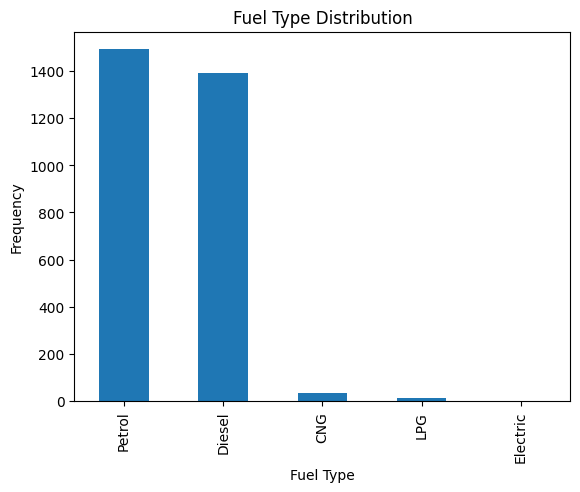

In [95]:

df['fuel'].value_counts().plot(kind= 'bar')
plt.title('Fuel Type Distribution')
plt.xlabel('Fuel Type')
plt.ylabel('Frequency')
plt.show()


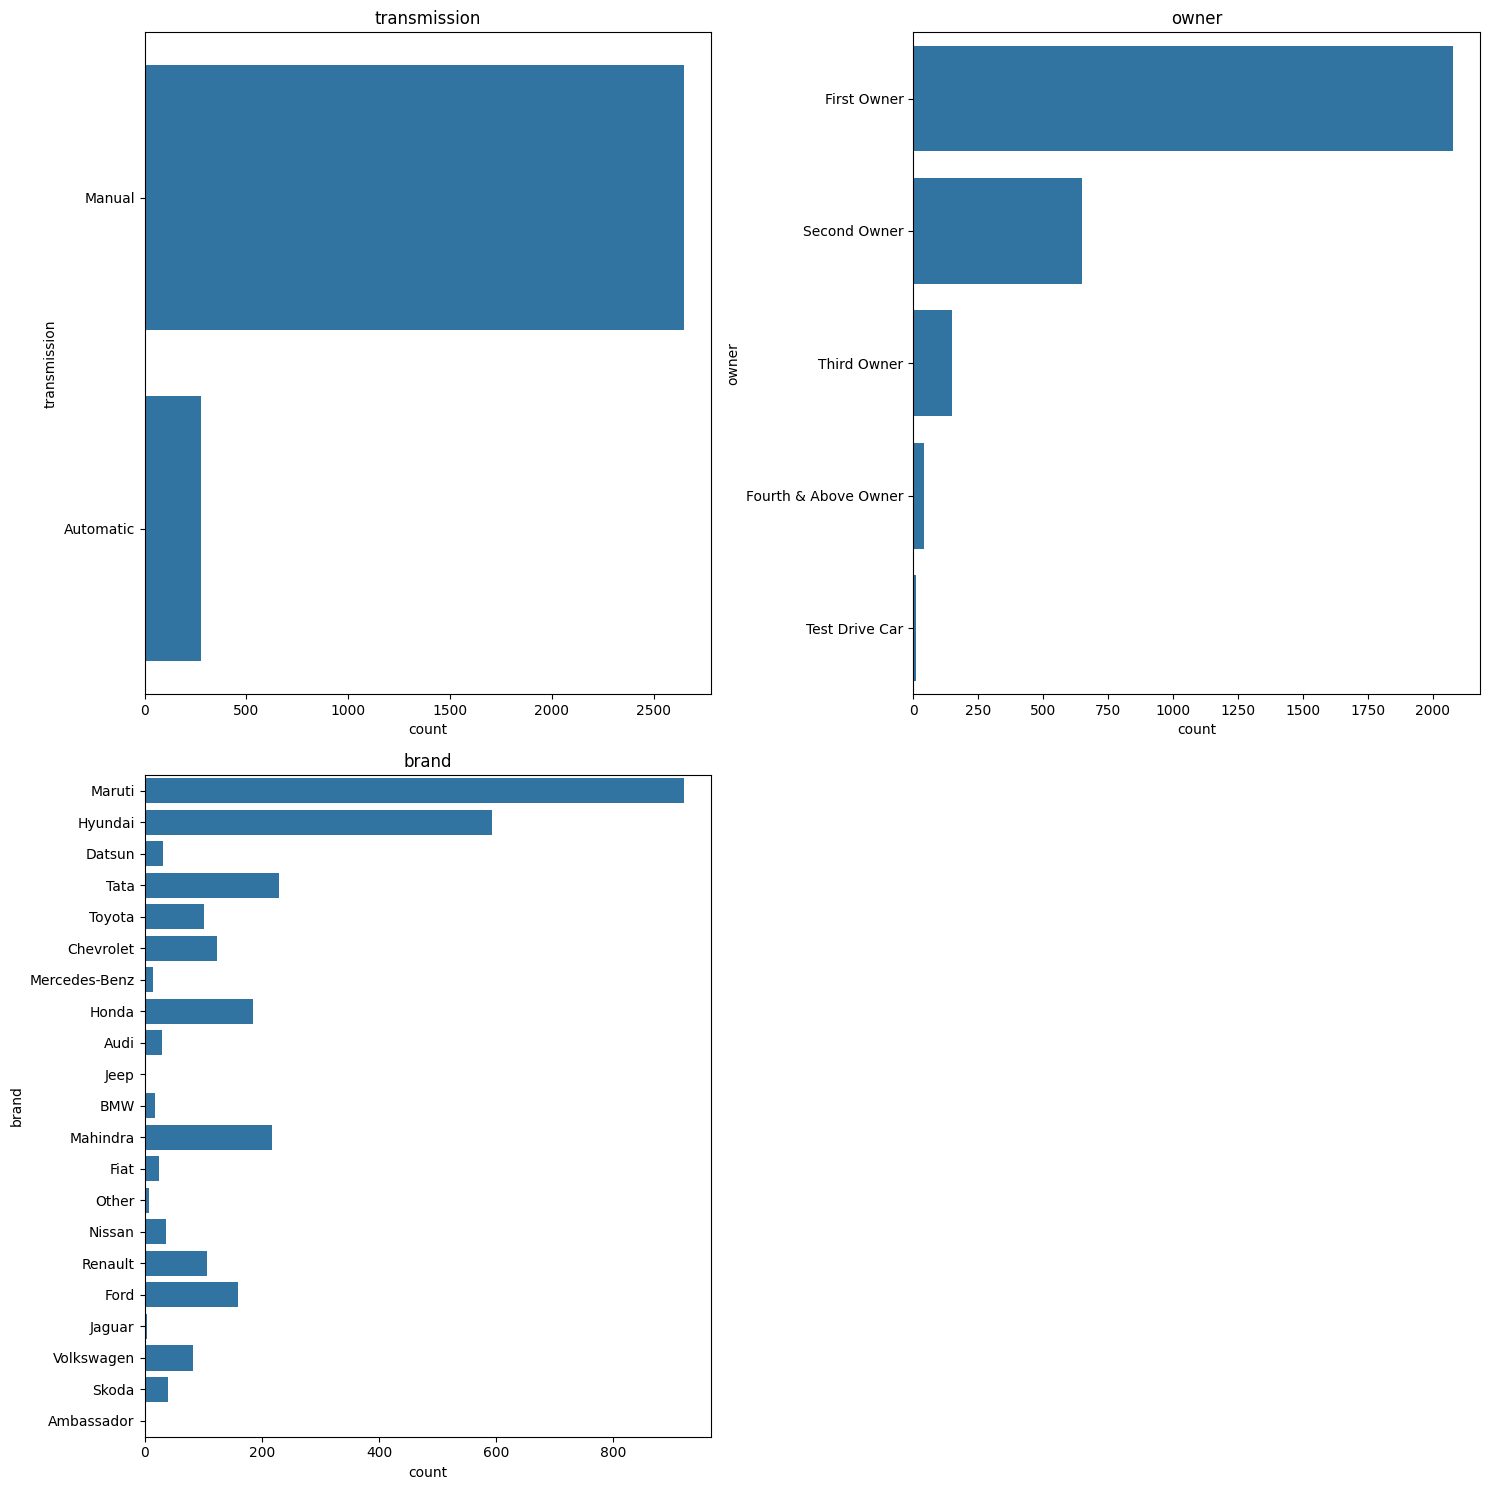

In [96]:
col = df.select_dtypes(include= 'object').columns

plt.figure(figsize= (15, 15))

for index, col in enumerate(col[2:], 1):
    plt.subplot(2, 2, index)
    sns.countplot(y= col, data= df)
    plt.title(col)

plt.tight_layout()
plt.show()

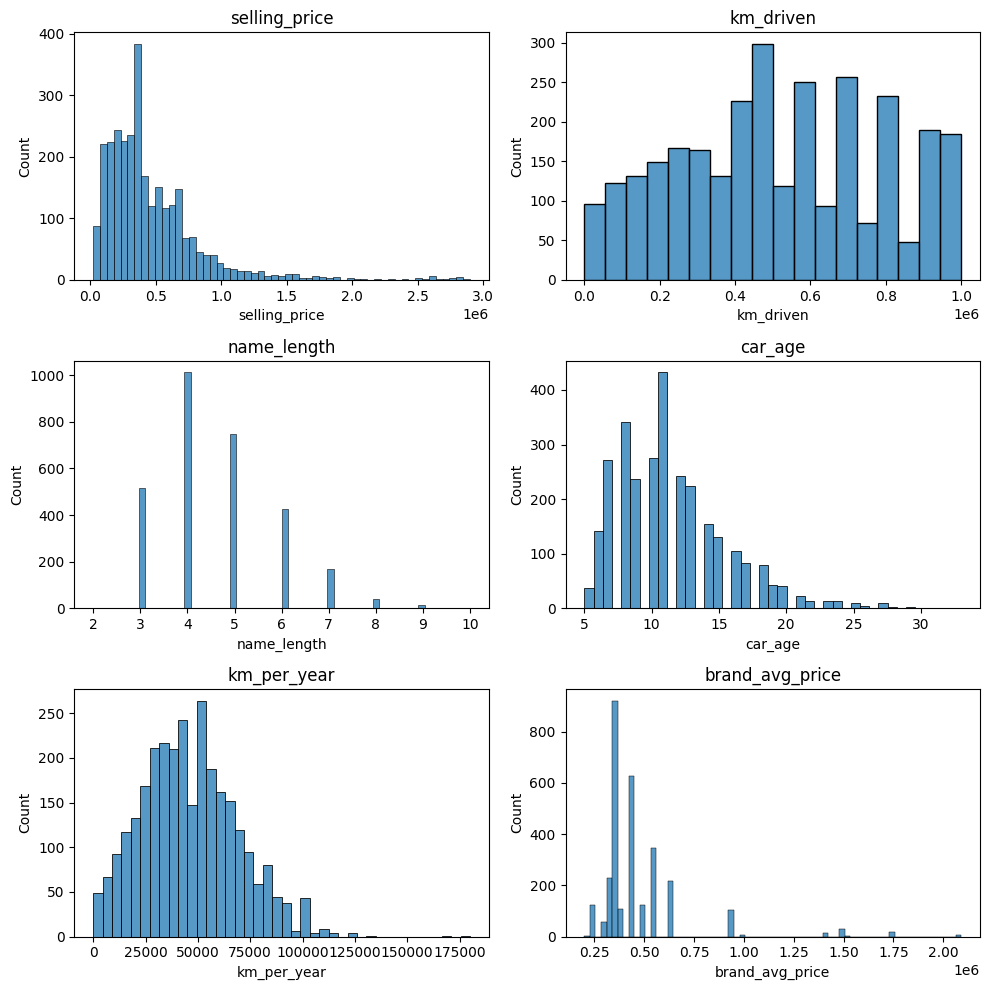

In [97]:
col = df.select_dtypes(include= 'number').columns

plt.figure(figsize= (10,10))

for index, col in enumerate(col, 1):
    plt.subplot(3, 2, index)
    sns.histplot(df[col])
    plt.title(col)

plt.tight_layout()
plt.show()

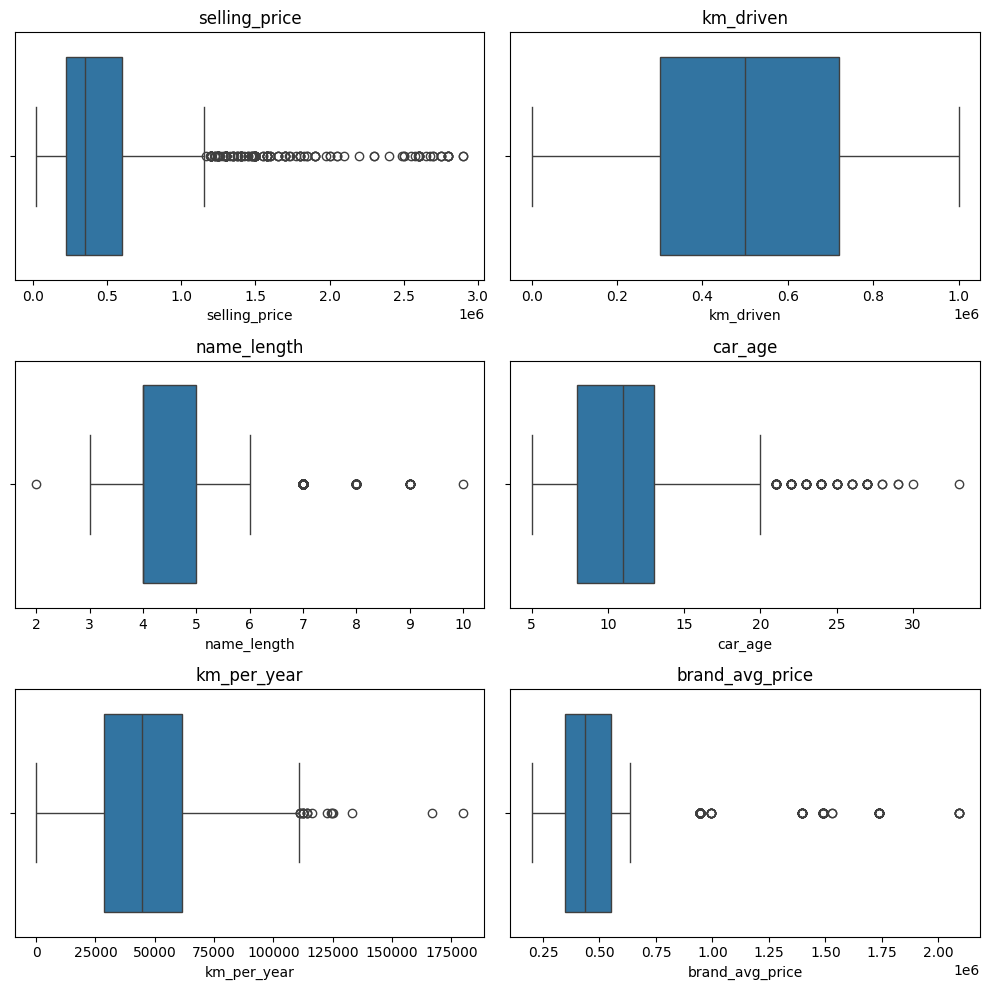

In [99]:
col = df.select_dtypes(include= 'number').columns

plt.figure(figsize= (10,10))

for index, col in enumerate(col, 1):
    plt.subplot(3, 2, index)
    sns.boxplot(x= df[col])
    plt.title(col)

plt.tight_layout()
plt.show()

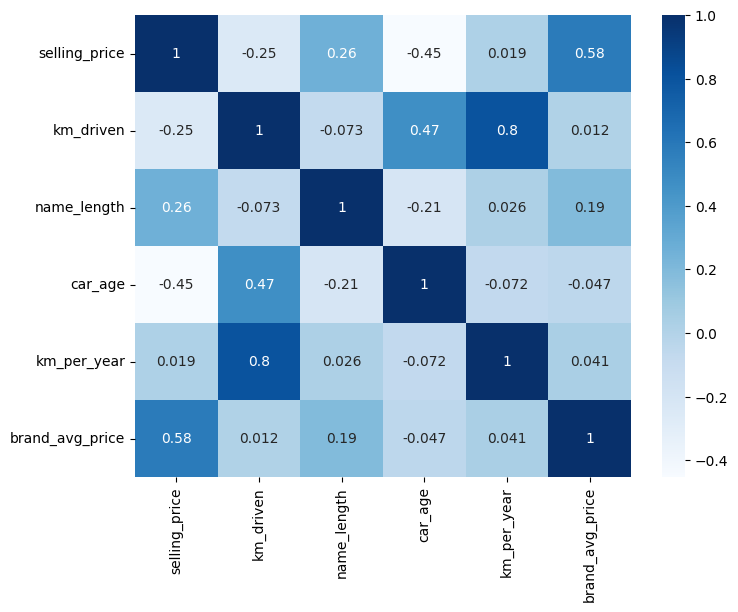

In [101]:
corr_matrix = df.select_dtypes(include= 'number').corr()

plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot= True, cmap= 'Blues')

plt.show()


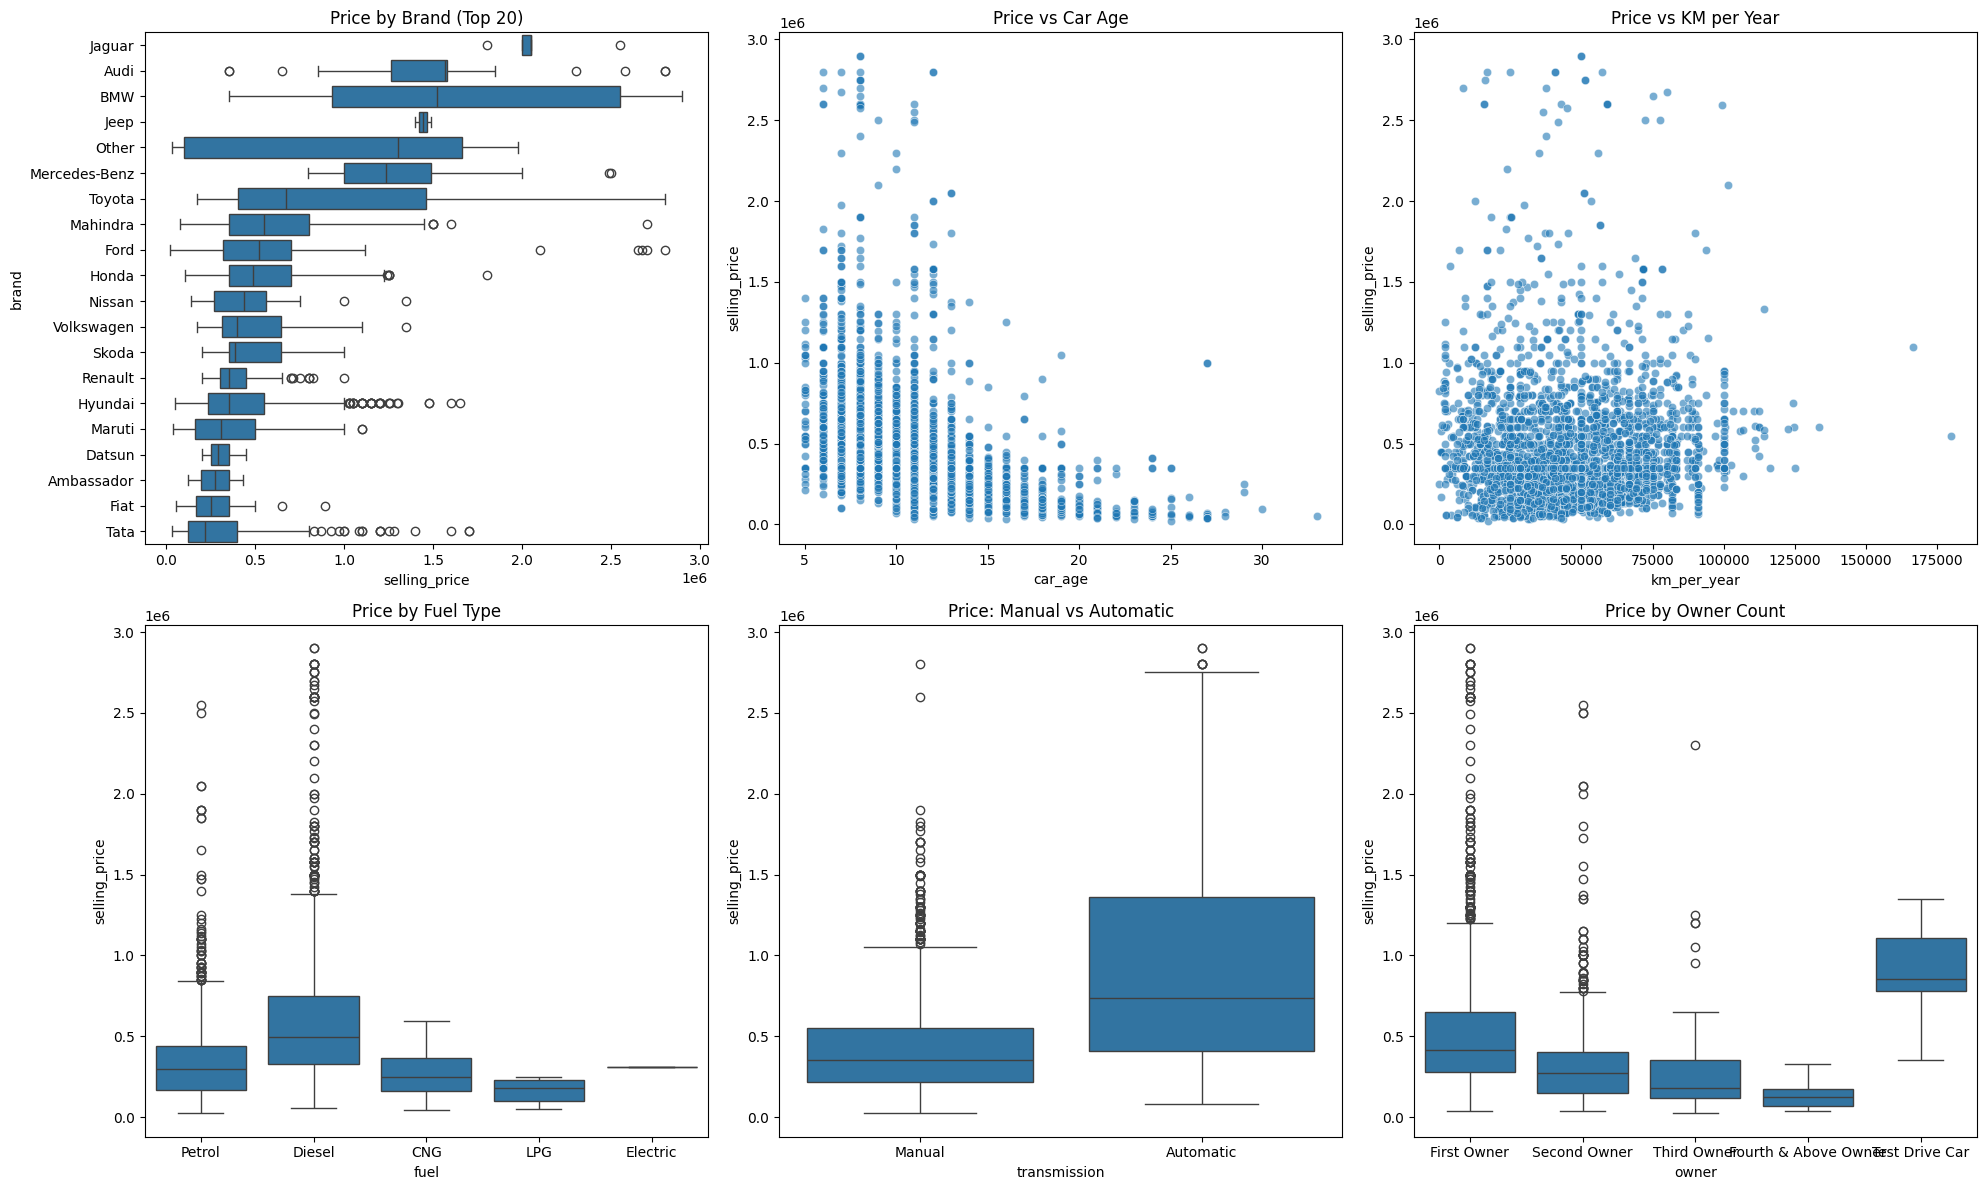

In [102]:
fig, ax = plt.subplots(2, 3, figsize=(20, 12))

# The price based on the brand
sns.boxplot(y='brand', x='selling_price', data=df,
            order=df.groupby('brand')['selling_price'].median().sort_values(ascending=False).index[:20],
            ax=ax[0,0])
ax[0,0].set_title('Price by Brand (Top 20)')

# The price based on  the car_age
sns.scatterplot(x='car_age', y='selling_price', data=df, alpha=0.6, ax=ax[0,1])
ax[0,1].set_title('Price vs Car Age')

# Price based on the KM_Per_year
sns.scatterplot(x='km_per_year', y='selling_price', data=df, alpha=0.6, ax=ax[0,2])
ax[0,2].set_title('Price vs KM per Year')

# The price based on the fuel type
sns.boxplot(x='fuel', y='selling_price', data=df, ax=ax[1,0])
ax[1,0].set_title('Price by Fuel Type')

# The price based on the transmission
sns.boxplot(x='transmission', y='selling_price', data=df, ax=ax[1,1])
ax[1,1].set_title('Price: Manual vs Automatic')

# The price based on owners
sns.boxplot(x='owner', y='selling_price', data=df, ax=ax[1,2])
ax[1,2].set_title('Price by Owner Count')

plt.tight_layout()
plt.show()

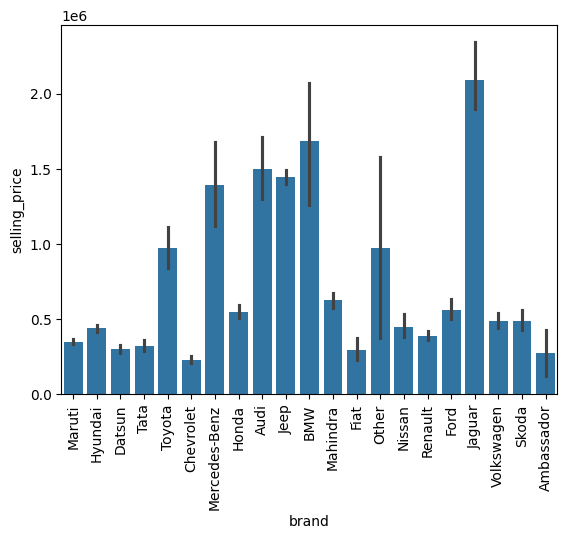

In [105]:
sns.barplot(x='brand',y='selling_price',data=df)
plt.xticks(rotation=90)
plt.show()

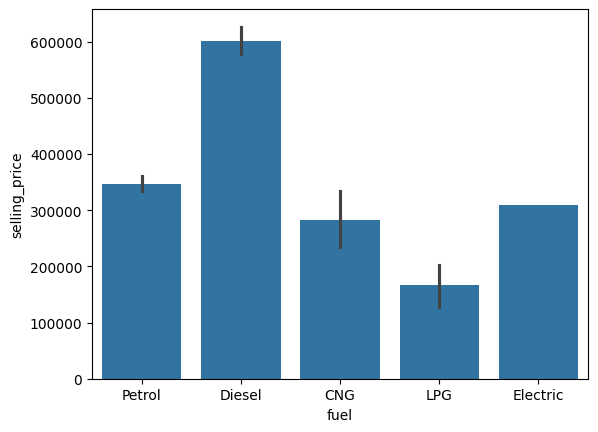

In [106]:
sns.barplot(x='fuel',y='selling_price',data=df)
plt.show()

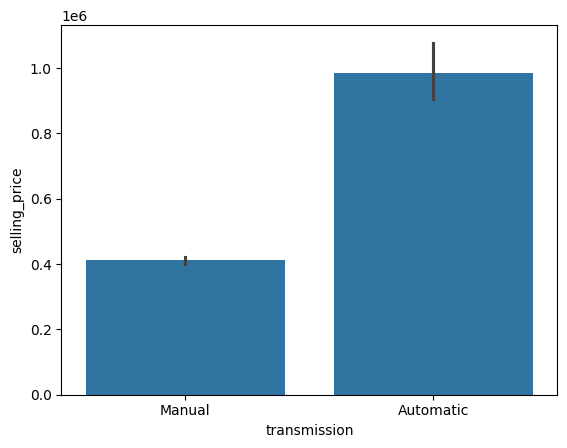

In [107]:
sns.barplot(x='transmission',y='selling_price',data=df)
plt.show()

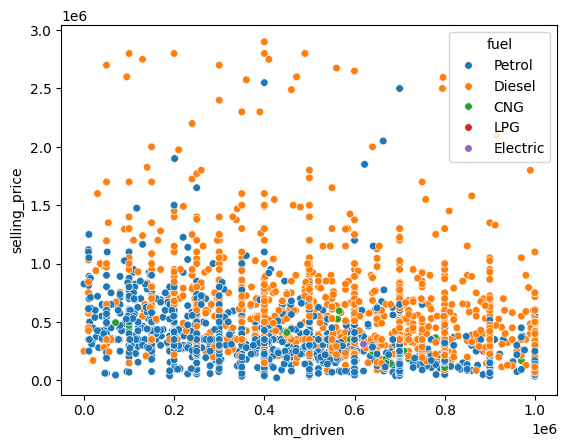

In [108]:
sns.scatterplot(x='km_driven',y='selling_price',hue='fuel',data=df,s=30)
plt.show()

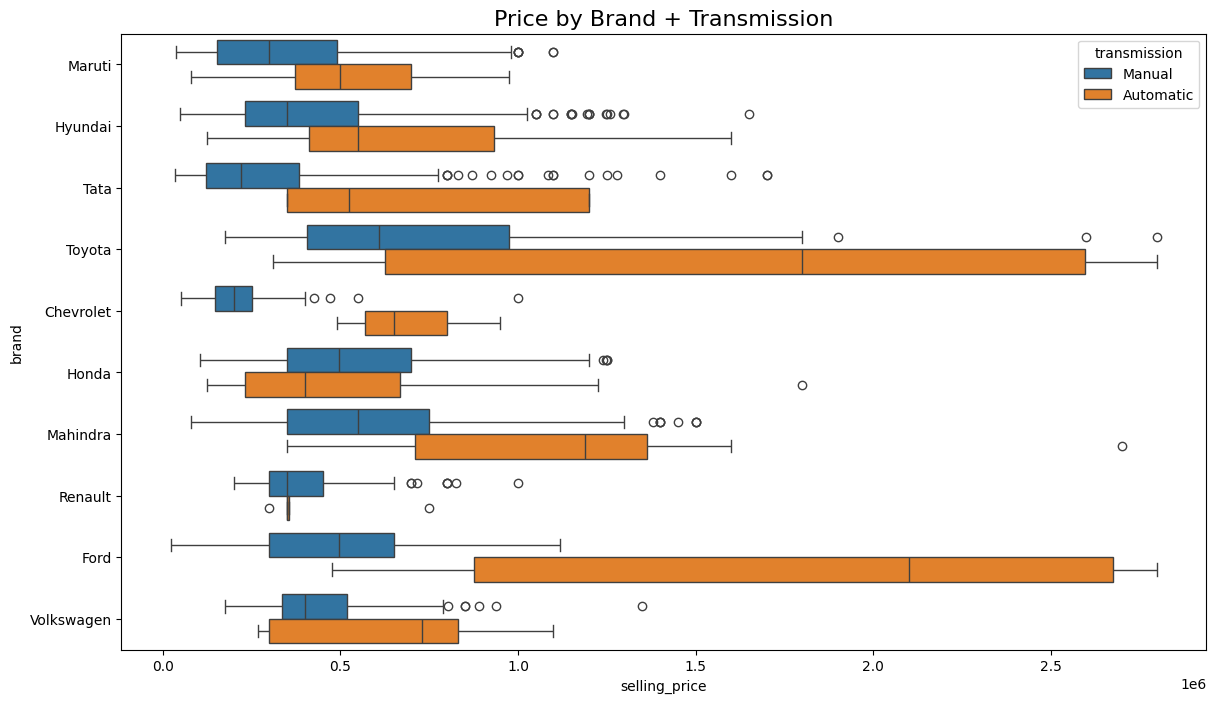

In [109]:
top10 = df['brand'].value_counts().head(10).index
plt.figure(figsize=(14, 8))
sns.boxplot(data=df[df['brand'].isin(top10)], y='brand', x='selling_price', hue='transmission')
plt.title('Price by Brand + Transmission', fontsize=16)
plt.show()

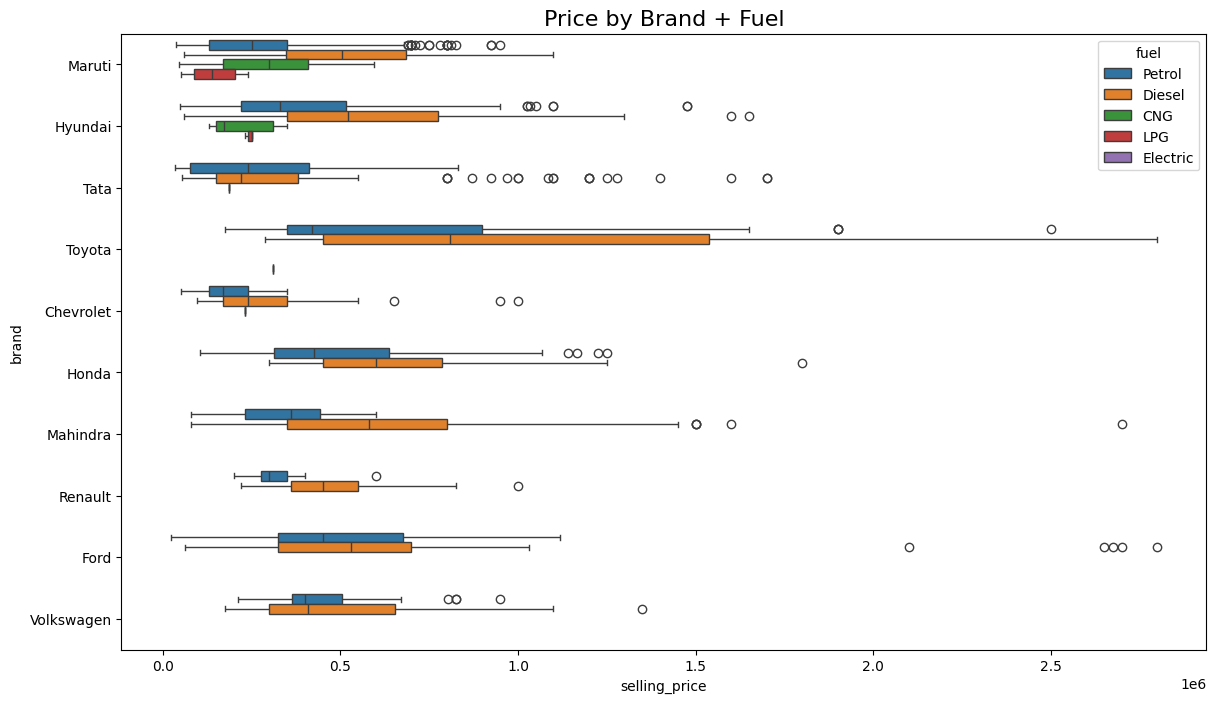

In [110]:
plt.figure(figsize=(14, 8))
sns.boxplot(data=df[df['brand'].isin(top10)], y='brand', x='selling_price', hue='fuel')
plt.title('Price by Brand + Fuel', fontsize=16)
plt.show()

# **Final Insights**:

# 🔹 **1️⃣ Data Quality & Cleaning Insights**

The dataset originally contained missing values, incorrect data types, negative prices, unrealistic car ages, and extreme outliers.

All numerical columns such as Selling Price, Km Driven, Year, and Car Age were converted to proper numeric formats.

Invalid values such as:

Negative or zero selling prices

Unrealistic kilometers driven

Car ages above 50 years

Years greater than 2025
were successfully removed.

Outliers were handled using logical real-world thresholds to remove only unrealistic values while keeping real high-value vehicles.

**✅ This cleaning process significantly improved data reliability and visualization clarity.**

# 🔹 **2️⃣ Selling Price Behavior**

The average selling price is approximately 465,000.

The majority of cars fall within the 200,000 – 600,000 price range.

A small number of high-priced cars still exist, representing luxury or premium brands, which reflects realistic market behavior.

After removing unrealistic extreme prices, the price distribution became well-balanced and suitable for analysis.

**✅ Insight:**

**The used car market is mainly concentrated in the mid-price range, indicating affordability-focused consumer behavior.**

# **🔹 3️⃣ Vehicle Usage Patterns (Km Driven & Km Per Year)**

Average kilometers driven is around 520,000 km, indicating moderate long-term usage.

The average Km per Year is approximately 46,000 km, reflecting normal daily usage patterns.

Extremely high annual mileage values were removed to prevent misleading interpretations.

**✅ Insight:**

**Most cars in the dataset show moderate and realistic usage over time.**

# **🔹 4️⃣ Car Age Analysis**

The average car age is approximately 11 years.

Most vehicles fall between 8 to 13 years old.

Very old vehicles were removed to maintain realistic market conditions.

**✅ Insight:**

**The dataset mainly represents well-used but still market-active cars.**

# **🔹 5️⃣ Fuel Type Distribution**

Petrol cars dominate the dataset, representing more than half of the vehicles.

Diesel appears as the second most common fuel type.

Other fuel types (CNG, LPG, Electric) have significantly lower representation.

**✅ Insight:**

**Petrol remains the most preferred fuel type in the used car market.**

# **🔹 6️⃣ Transmission Analysis**

Manual transmission overwhelmingly dominates the dataset.

Automatic cars represent only a small fraction of the market.

**✅ Insight:**

**Manual transmission is still the most common choice in this market segment.**

# **🔹 7️⃣ Seller Type Impact**

The majority of vehicles are sold by individual sellers rather than dealers or companies.

Dealer-based sales form only a smaller portion of the dataset.

**✅ Insight:**

**The used car market relies heavily on individual-to-individual transactions.**

# **🔹 8️⃣ Owner Distribution**

Most cars are listed under First Owner.

Fewer cars are second or third owner vehicles.

**✅ Insight:**

**A large portion of vehicles has only one previous owner, which increases buyer trust and perceived value.**

# **🔹 9️⃣ Brand Analysis**

The dataset contains 19 different brands.

Maruti is the most dominant brand in terms of vehicle count.

Brand average price analysis shows noticeable variation between economy brands and premium brands.

**✅ Insight:**

**The dataset is heavily influenced by economy car brands, with Maruti leading by a large margin.**

# **🔹 🔟 Relationships Between Key Variables**

Selling Price decreases as Car Age increases.

Selling Price decreases as Km Driven increases.

Cars with:

Automatic transmission

First owner status

Lower mileage
tend to have higher selling prices.

Fuel type also shows clear influence on pricing, where petrol and diesel dominate price variations.

**✅ Insight:**

**Vehicle age, mileage, ownership, and transmission type are the most influential factors affecting car prices.**

#**✅ كلما زاد عمر السيارة، قلّ سعرها.**

#**✅ كلما زاد عدد الكيلومترات، انخفضت قيمة السيارة.**

#**✅ ماركة السيارة تؤثر بقوة على السعر.**

#**✅ ناقل الحركة اليدوي هو الأكثر انتشارًا.**

#**✅ أغلب السيارات بنزين ومن المالك الأول.**

#**✅ وجود سيارات ذات أسعار مرتفعة طبيعي بسبب الفئة الفاخرة.**